In [1]:
#Installing the lib
!pip install nltk

In [2]:
import nltk
import string
from nltk.stem import PorterStemmer, LancasterStemmer, SnowballStemmer
from nltk.stem import WordNetLemmatizer
from nltk import FreqDist

In [3]:
# donwlaoding the modeles
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('maxent_ne_chunker')
nltk.download('words')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-dat

True

In [4]:
data = """India (Hindi: Bhārat), officially the Republic of India, is a country in South Asia. It is the seventh-largest 
        country by area, the second-most populous country, and the most populous democracy in the world. Bounded by the 
        Indian Ocean on the south, the Arabian Sea on the southwest, and the Bay of Bengal on the southeast, it shares land 
        borders with Pakistan to the west; China, Nepal, and Bhutan to the north; and Bangladesh and Myanmar to the east. 
        In the Indian Ocean, India is in the vicinity of Sri Lanka and the Maldives; its Andaman and Nicobar Islands share 
        a maritime border with Thailand and Indonesia."""

In [5]:
nltk.sent_tokenize(data)

['India (Hindi: Bhārat), officially the Republic of India, is a country in South Asia.',
 'It is the seventh-largest \n        country by area, the second-most populous country, and the most populous democracy in the world.',
 'Bounded by the \n        Indian Ocean on the south, the Arabian Sea on the southwest, and the Bay of Bengal on the southeast, it shares land \n        borders with Pakistan to the west; China, Nepal, and Bhutan to the north; and Bangladesh and Myanmar to the east.',
 'In the Indian Ocean, India is in the vicinity of Sri Lanka and the Maldives; its Andaman and Nicobar Islands share \n        a maritime border with Thailand and Indonesia.']

In [6]:
len(nltk.sent_tokenize(data))

4

In [7]:
nltk.word_tokenize(data)
len(nltk.word_tokenize(data))

126

In [8]:
# POS Tagging
data = 'we will see an example of POS tagging'
word_token = nltk.word_tokenize(data)
pos = nltk.pos_tag(word_token)
pos

[('we', 'PRP'),
 ('will', 'MD'),
 ('see', 'VB'),
 ('an', 'DT'),
 ('example', 'NN'),
 ('of', 'IN'),
 ('POS', 'NNP'),
 ('tagging', 'VBG')]

link for all abb for pos - https://www.guru99.com/pos-tagging-chunking-nltk.html

# Function that takes and string and return total sentences count, total word count , and all the verbs in a sentence

In [9]:
data = """Kohli captained India Under-19s to victory at the 2008 Under-19 World Cup in Malaysia. After a few months later, 
        he made his ODI debut for India against Sri Lanka at the age of 19. Initially having played as a reserve batsman in 
        the Indian team, he soon established himself as a regular in the ODI middle-order and was part of the squad that 
        won the 2011 World Cup. He made his Test debut in 2011 and shrugged off the tag of "ODI specialist" by 2013 with 
        Test hundreds in Australia and South Africa.[3] Having reached the number one spot in the ICC rankings for ODI 
        batsmen for the first time in 2013,[4] Kohli also found success in the Twenty20 format, winning the Man of the 
        Tournament twice at the ICC World Twenty20 (in 2014 and 2016)"""

In [10]:
def info(data):
    len_sent = len(nltk.sent_tokenize(data))
    len_word = len(nltk.word_tokenize(data))
    verb_list = []
    for words in nltk.pos_tag(nltk.word_tokenize(data)):
        if words[1].startswith('VB'):
            verb_list.append(words[0])       
    return {'len_sen':len_sent , 'len_word':len_word , 'verbs':verb_list}  

In [11]:
information = info(data)
information

{'len_sen': 5,
 'len_word': 154,
 'verbs': ['captained',
  'made',
  'having',
  'played',
  'established',
  'was',
  'won',
  'made',
  'shrugged',
  'reached',
  '[',
  'found',
  'winning']}

In [12]:
from nltk.corpus import stopwords
stopwords = stopwords.words('english')
len(stopwords)

179

In [13]:
data = """India (Hindi: Bhārat), officially the Republic of India, is a country in South Asia. It is the seventh-largest 
        country by area, the second-most populous country, and the most populous democracy in the world. Bounded by the 
        Indian Ocean on the south, the Arabian Sea on the southwest, and the Bay of Bengal on the southeast, it shares land 
        borders with Pakistan to the west; China, Nepal, and Bhutan to the north; and Bangladesh and Myanmar to the east. 
        In the Indian Ocean, India is in the vicinity of Sri Lanka and the Maldives; its Andaman and Nicobar Islands share 
        a maritime border with Thailand and Indonesia."""

In [14]:
punct = string.punctuation
punct

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [15]:
def clean_sentence(sentence):
    clean_data = []
    for word in nltk.word_tokenize(sentence.lower()):
        if word not in punct:
            if word not in stopwords:
                clean_data.append(word)
    return " ".join(clean_data) , clean_data

In [16]:
clean_sen , clean_data = clean_sentence(data)
clean_data

['india',
 'hindi',
 'bhārat',
 'officially',
 'republic',
 'india',
 'country',
 'south',
 'asia',
 'seventh-largest',
 'country',
 'area',
 'second-most',
 'populous',
 'country',
 'populous',
 'democracy',
 'world',
 'bounded',
 'indian',
 'ocean',
 'south',
 'arabian',
 'sea',
 'southwest',
 'bay',
 'bengal',
 'southeast',
 'shares',
 'land',
 'borders',
 'pakistan',
 'west',
 'china',
 'nepal',
 'bhutan',
 'north',
 'bangladesh',
 'myanmar',
 'east',
 'indian',
 'ocean',
 'india',
 'vicinity',
 'sri',
 'lanka',
 'maldives',
 'andaman',
 'nicobar',
 'islands',
 'share',
 'maritime',
 'border',
 'thailand',
 'indonesia']

In [17]:
lancaster = LancasterStemmer()
porter = PorterStemmer()
snowball = SnowballStemmer('english')

In [18]:
print('Porter Stemmer')
print(porter.stem('hobby'))
print(porter.stem('hobbies'))
print(porter.stem('computer'))
print(porter.stem('computation'))
print('----------------------------------------------')
print('lancaster Stemmer')
print(lancaster.stem('hobby'))
print(lancaster.stem('hobbies'))
print(lancaster.stem('computer'))
print(lancaster.stem('computation'))
print('----------------------------------------------')
print('Snowball Stemmer')
print(snowball.stem('hobby'))
print(snowball.stem('hobbies'))
print(snowball.stem('computer'))
print(snowball.stem('computation'))

Porter Stemmer
hobbi
hobbi
comput
comput
----------------------------------------------
lancaster Stemmer
hobby
hobby
comput
comput
----------------------------------------------
Snowball Stemmer
hobbi
hobbi
comput
comput


In [19]:
sent = 'i Was going to the office on my bike when i saw a car passing by hit the tree'
token = nltk.word_tokenize(sent)
for stemmer in (snowball , lancaster , porter):
    print(stemmer)
    stemm = [stemmer.stem(t) for t in token]
    print(" ". join(stemm))

i was go to the offic on my bike when i saw a car pass by hit the tree
<LancasterStemmer>
i was going to the off on my bik when i saw a car pass by hit the tre
<PorterStemmer>
i wa go to the offic on my bike when i saw a car pass by hit the tree


# lemmatization

In [20]:
lemma = WordNetLemmatizer()

In [21]:
print(lemma.lemmatize('goes' , pos='v'))
print(lemma.lemmatize('going' ,  pos='v'))
print(lemma.lemmatize('saw',  pos='v'))

go
go
saw


In [22]:
sent = 'i Was going to the office on my bike when i saw a car passing by hit the tree'

def clean_sentence(sentence):
    clean_data = []
    for word in nltk.word_tokenize(sentence.lower()):
        if word not in punct:
            if word not in stopwords:
                clean_data.append(lemma.lemmatize(word , pos='v'))
    return " ".join(clean_data) , clean_data

In [23]:
data,_ = clean_sentence(sent)

In [24]:
data

'go office bike saw car pass hit tree'

In [25]:
sent = 'Barack Obama, officially the Republic of India, is a country in South Asia'

words = nltk.word_tokenize(sent)
pos_tag = nltk.pos_tag(words)
named_entity = nltk.ne_chunk(pos_tag)
print(named_entity)

(S
  (PERSON Barack/NNP)
  (GPE Obama/NNP)
  ,/,
  officially/RB
  the/DT
  (ORGANIZATION Republic/NNP)
  of/IN
  (GPE India/NNP)
  ,/,
  is/VBZ
  a/DT
  country/NN
  in/IN
  (GPE South/NNP Asia/NNP))


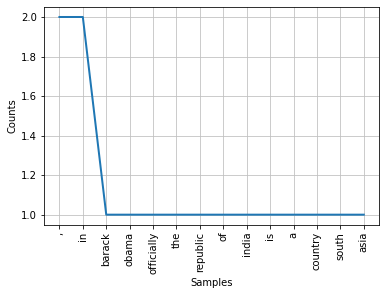

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [26]:
sent = 'Barack Obama, officially the Republic of India, is a country in In South Asia'
freq = FreqDist(nltk.word_tokenize(sent.lower()))
freq.plot()

In [27]:
print(dict(freq))

{'barack': 1, 'obama': 1, ',': 2, 'officially': 1, 'the': 1, 'republic': 1, 'of': 1, 'india': 1, 'is': 1, 'a': 1, 'country': 1, 'in': 2, 'south': 1, 'asia': 1}


In [28]:
freq['in']

2